In [1]:
import pingouin as pg
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
#set seed
np.random.seed(42)

#generate data
x = np.random.normal(loc=2, scale=3, size=100)
y = np.random.normal(loc=0, scale=1, size=100)

In [4]:
ttest_ind(x,y)

Ttest_indResult(statistic=5.772051762923951, pvalue=2.986379980167149e-08)

In [5]:
pg.ttest(x,y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.772052,198,two-sided,2.986380e-08,"[1.1, 2.24]",0.816291,3.671e+05,0.999923


In [7]:
# parameters
EFFECT_SIZE = 0.5
ALPHA = 0.05
POWER = 0.8

# using statsmodels
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = EFFECT_SIZE, power = POWER, alpha = ALPHA)
print(f'Required sample size (statsmodels): {sample_size:.0f}')

# using pingouin
sample_size = pg.power_ttest(d = EFFECT_SIZE, alpha = ALPHA, power = POWER, n = None)
print(f'Required sample size (pingouin): {sample_size:.0f}')

Required sample size (statsmodels): 64
Required sample size (pingouin): 64


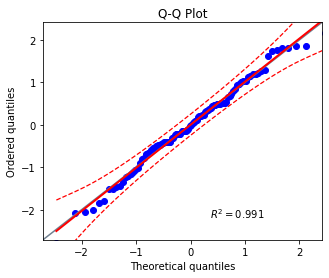

In [8]:
ax = pg.qqplot(x, dist='norm')

In [9]:
# loading and transforming data
df = pg.read_dataset('anova')
df = df.drop('Subject', axis=1)
df.columns = [x.lower().replace(' ', '_') for x in df.columns]


In [12]:
aov = pg.anova(dv='pain_threshold', between='hair_color', data=df, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,hair_color,1360.726316,3,453.575439,6.791407,0.004114,0.575962
1,Within,1001.800000,15,66.786667,NaN,NaN,NaN


In [14]:
ols_model = ols('pain_threshold ~ hair_color', data=df).fit()
aov = sm.stats.anova_lm(ols_model)
aov

,df,sum_sq,mean_sq,F,PR(>F)
hair_color,3.0,1360.726316,453.575439,6.791407,0.004114
Residual,15.0,1001.800000,66.786667,NaN,NaN


In [15]:
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y=True)

In [16]:
lm = pg.linear_regression(X, y)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,36.459488,5.103459,7.144074,3.283439e-12,0.740643,0.73379,26.432226,46.486751
1,x1,-0.108011,0.032865,-3.286517,1.086810e-03,0.740643,0.73379,-0.172584,-0.043438
2,x2,0.046420,0.013727,3.381576,7.781097e-04,0.740643,0.73379,0.019449,0.073392
3,x3,0.020559,0.061496,0.334310,7.382881e-01,0.740643,0.73379,-0.100268,0.141385
4,x4,2.686734,0.861580,3.118381,1.925030e-03,0.740643,0.73379,0.993904,4.379563
5,x5,-17.766611,3.819744,-4.651257,4.245644e-06,0.740643,0.73379,-25.271634,-10.261589
6,x6,3.809865,0.417925,9.116140,1.979441e-18,0.740643,0.73379,2.988727,4.631004
7,x7,0.000692,0.013210,0.052402,9.582293e-01,0.740643,0.73379,-0.025262,0.026647
8,x8,-1.475567,0.199455,-7.398004,6.013491e-13,0.740643,0.73379,-1.867455,-1.083679
9,x9,0.306049,0.066346,4.612900,5.070529e-06,0.740643,0.73379,0.175692,0.436407


In [17]:
# adding the constant
X = sm.add_constant(X)

# estimating the model
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 05 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        16:29:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""